# Kernel SVM

In [1]:
# Importing the dataset

dataset = read.csv('Social_Network_Ads.csv')
dataset = dataset[3:5]

In [2]:
# Encoding the target feature as factor
dataset$Purchased = factor(dataset$Purchased, levels = c(0, 1))

In [3]:
# Splitting the dataset into the Training set and Test set

library(caTools)
set.seed(123)
split = sample.split(dataset$Purchased, SplitRatio = 0.75)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

In [4]:
# Feature Scaling
training_set[-3] = scale(training_set[-3])
test_set[-3] = scale(test_set[-3])

In [5]:
tail(training_set)

,Age,EstimatedSalary,Purchased
393,0.7202414,-0.7312956,1
394,2.1543504,-0.8169163,1
396,0.8158487,-0.8454565,1
397,1.2938850,-1.3591805,1
398,1.1982777,-1.4448012,1
399,-0.1402240,-1.0737783,0


In [6]:
head(test_set)

,Age,EstimatedSalary,Purchased
2,-0.3041906,-1.5135434,0
4,-1.0599437,-0.3245603,0
5,-1.8156969,0.2859986,0
9,-1.2488820,-1.0957926,0
12,-1.1544129,-0.4852337,0
18,0.6405008,-1.3207353,1


In [7]:
# Fitting Kernel SVM to the Training set

library(e1071)
classifier = svm(formula = Purchased ~ .,
                 data = training_set,
                 type = 'C-classification',
                 kernel = 'radial')

In [8]:
# Predicting the Test set results
y_pred = predict(classifier, newdata = test_set[-3])

In [9]:
# Making the Confusion Matrix
cm = table(test_set[, 3], y_pred)

In [10]:
cm

   y_pred
     0  1
  0 58  6
  1  4 32

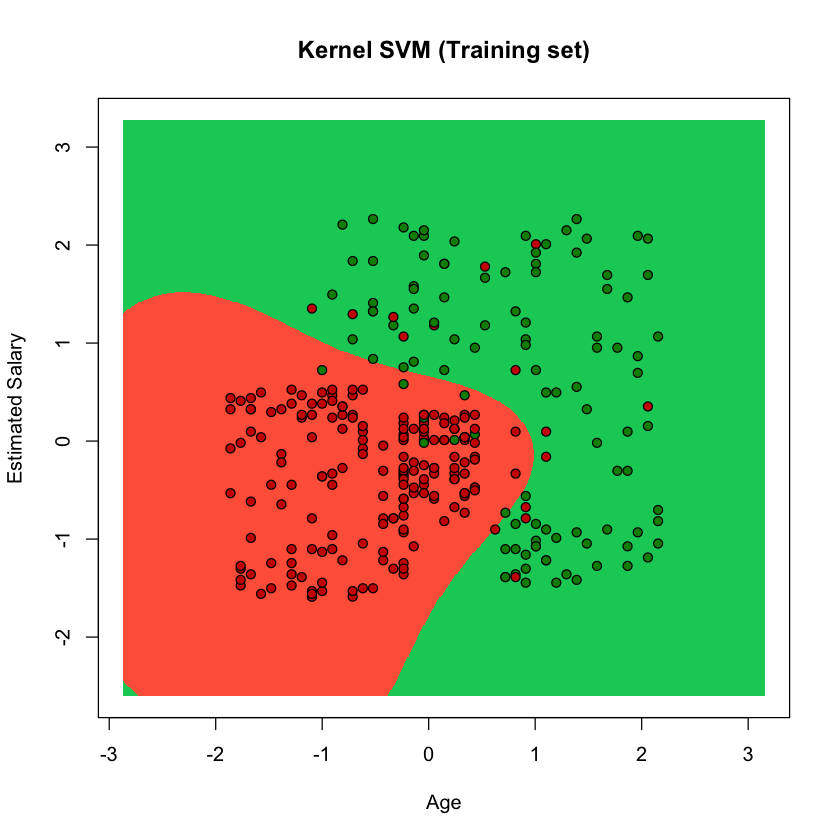

In [11]:
# Visualising the Training set results
library(ElemStatLearn)
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3],
     main = 'Kernel SVM (Training set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

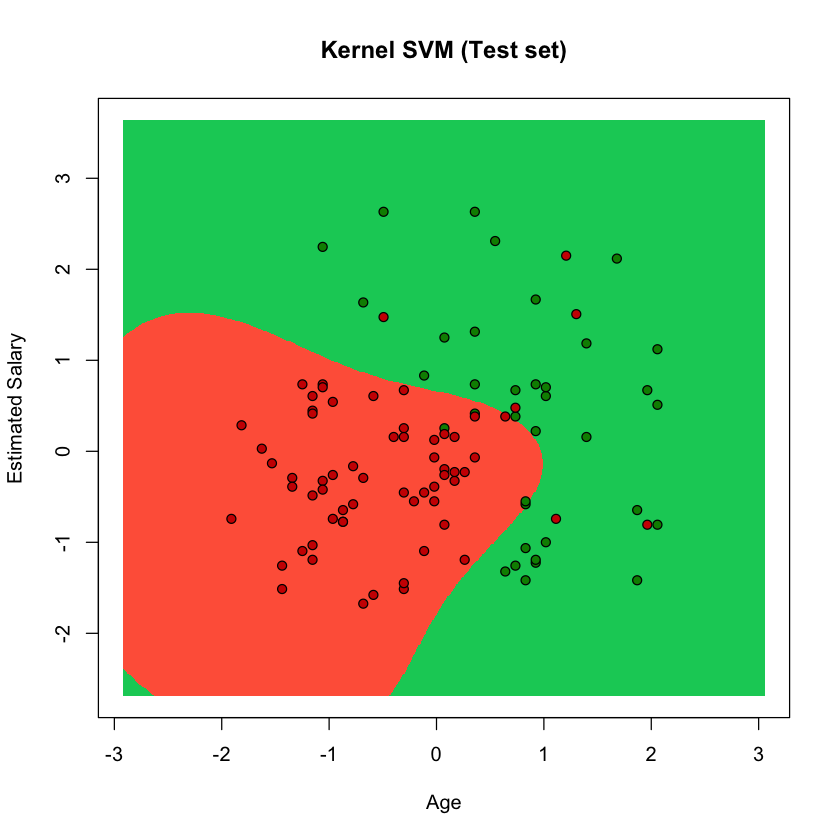

In [12]:
# Visualising the Test set results
library(ElemStatLearn)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3], main = 'Kernel SVM (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

**So far the Kernel SVM classifier appears to be the most effective in classifying the users.**